<a href="https://colab.research.google.com/github/Abdelrhman-hamdy11/Web-Scraping-/blob/main/WebScarpingAppleProducts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install cloudscraper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 2.5 MB/s eta 0:00:00


In [8]:
import cloudscraper
from bs4 import BeautifulSoup
from itertools import zip_longest
import csv

# Initialize Cloudscraper
scraper = cloudscraper.create_scraper()

# Initialize lists
product_name = []
product_price = []

# Loop through pages (adjust range as needed)
for i in range(1, 15):  # Adjust pages if needed
    url = f"https://www.jumia.com.eg/catalog/?q=apple&page="+str(i)+"#catalog-listing"

    # Send request using Cloudscraper
    res = scraper.get(url)

    # Parse content
    soup = BeautifulSoup(res.content, "html.parser")

    # Extract product names and prices
    names = soup.find_all("h3", {"class":"name"})
    prices = soup.find_all("div", {"class":"prc"})

    # Store data
    for item in range(len(names)):
        product_name.append(names[item].text.strip())
        product_price.append(prices[item].text.strip() if item < len(prices) else "N/A")

# Save results
file_list = [product_name, product_price]
ex = zip_longest(*file_list)

with open("jumia_apple_products.csv", "w", newline="", encoding="utf-8-sig") as file:
    wr = csv.writer(file)
    wr.writerow(["Product", "Price"])
    wr.writerows(ex)

print("Scraping completed! Data saved in 'jumia_apple_products.csv'.")


Scraping completed! Data saved in 'jumia_apple_products.csv'.


In [19]:
import cloudscraper
from bs4 import BeautifulSoup
from itertools import zip_longest
import csv

# Initialize Cloudscraper
scraper = cloudscraper.create_scraper()

# Initialize lists
product_name = []
product_price = []

# Loop through pages (adjust range as needed)
for i in range(1, 20):  # Adjust number of pages
    url = f"https://www.amazon.eg/s?k=apple&page={i}&language=en_AE"

    # Send request using Cloudscraper with a user-agent
    headers = {"User-Agent": "Mozilla/5.0"}
    res = scraper.get(url, headers=headers)

    # Parse content
    soup = BeautifulSoup(res.content, "html.parser")

    # Extract product names and prices
    names = soup.find_all("h2", {"class":"a-size-base-plus a-spacing-none a-color-base a-text-normal"})  # Adjust class if needed
    prices = soup.find_all("span", class_="a-price-whole")  # Adjust class if needed

    # Store data
    for item in range(len(names)):
        product_name.append(names[item].text.strip())
        product_price.append(prices[item].text.strip() if item < len(prices) else "N/A")

# Save results
file_list = [product_name, product_price]
ex = zip_longest(*file_list)

with open("amazon_apple_products.csv", "w", newline="", encoding="utf-8-sig") as file:
    wr = csv.writer(file)
    wr.writerow(["Product", "Price"])
    wr.writerows(ex)

print("Scraping completed! Data saved in 'amazon_apple_products.csv'.")


Scraping completed! Data saved in 'amazon_apple_products.csv'.


In [24]:
import cloudscraper
from bs4 import BeautifulSoup
from itertools import zip_longest
import csv
import threading

# Initialize Cloudscraper
scraper = cloudscraper.create_scraper()

# Initialize lists for storing data
products = []
lock = threading.Lock()  # To handle shared resource access

def scrape_amazon():
    global products
    for i in range(1, 20):  # Adjust number of pages
        url = f"https://www.amazon.eg/s?k=apple&page={i}&language=en_AE"

        # Send request using Cloudscraper with a user-agent
        headers = {"User-Agent": "Mozilla/5.0"}
        res = scraper.get(url, headers=headers)
        soup = BeautifulSoup(res.content, "html.parser")

        # Extract product names and prices
        names = soup.find_all("h2", {"class":"a-size-base-plus a-spacing-none a-color-base a-text-normal"})  # Product names
        prices = soup.find_all("span", class_="a-price-whole")  # Prices

        # Store data
        with lock:  # Prevent data race conditions
            for item in range(len(names)):
                products.append([names[item].text.strip(),
                                 prices[item].text.strip() if item < len(prices) else "N/A",
                                 "Amazon"])

def scrape_jumia():
    global products
    for i in range(1, 15):  # Adjust number of pages
        url = f"https://www.jumia.com.eg/catalog/?q=apple&page={i}#catalog-listing"

        # Send request using Cloudscraper
        res = scraper.get(url)
        soup = BeautifulSoup(res.content, "html.parser")

        # Extract product names and prices
        names = soup.find_all("h3", {"class":"name"})
        prices = soup.find_all("div", {"class":"prc"})

        # Store data
        with lock:
            for item in range(len(names)):
                products.append([names[item].text.strip(),
                                 prices[item].text.strip() if item < len(prices) else "N/A",
                                 "Jumia"])

# Create threads for Amazon and Jumia scraping
amazon_thread = threading.Thread(target=scrape_amazon)
jumia_thread = threading.Thread(target=scrape_jumia)

# Start threads
amazon_thread.start()
jumia_thread.start()

# Wait for both threads to complete
amazon_thread.join()
jumia_thread.join()

# Save results to CSV
with open("apple_products.csv", "w", newline="", encoding="utf-8-sig") as file:
    wr = csv.writer(file)
    wr.writerow(["Product", "Price", "Website"])
    wr.writerows(products)

print("Scraping completed! Data saved in 'apple_products.csv'.")



Scraping completed! Data saved in 'apple_products.csv'.


In [40]:
import pandas as pd
df = pd.read_csv("apple_products.csv")
df.head(10)

,Product,Price,Website
0,Apple IPhone 15 Single SIM 5G 128GB/6GB - 6.1 ...,"EGP 48,400.00",Jumia
1,"Apple IPhone 13 - 6.1"" 128GB/4GB Single SIM 5G...","EGP 34,999.00",Jumia
2,Apple IPhone 16 Pro Max Single SIM 256GB/8GB -...,"EGP 79,999.00",Jumia
3,Apple IPhone 13 Mobile Phone - 6.1 Inches - Si...,"EGP 34,999.00",Jumia
4,Apple Iphone 13 Mobile Phone - 6.1 Inches - Si...,"EGP 34,999.00",Jumia
5,"Apple IPhone 16 Single SIM 128GB/8GB - 6.1"" M...","EGP 55,555.00",Jumia
6,"Apple IPad 2021 (9th) 10.2-Inch, 64GB, WiFi, S...","EGP 15,500.00",Jumia
7,Apple IPhone 16 Pro Max Single SIM 256GB/8GB -...,"EGP 79,999.00",Jumia
8,Apple IPhone 15 Pro Max Single SIM 256GB/8GB -...,"EGP 79,999.00",Jumia
9,Apple Air Tag 1 Pack,"EGP 2,500.00",Jumia


In [42]:
df[df['Website'] == 'Amazon'].head(10)

,Product,Price,Website
40,AirPods Pro (2nd Generation) Wireless Ear Buds...,"11,400.",Amazon
41,"AirPods 4 ANC Wireless Earbuds, Bluetooth Head...","9,700.",Amazon
42,Adaptador de Corriente USB-C de 20 W,"1,199.",Amazon
43,USB-C Woven Charge Cable (1 m) ​​​​​​​,"1,199.",Amazon
44,AirTag,"1,999.",Amazon
45,"AirTag, Pack of 4","6,500.",Amazon
46,Pencil Pro,"7,250.",Amazon
47,"3 in 1 Wireless Charging Station, Fast Wireles...","1,397.",Amazon
48,"2022 10.9-inch iPad (Wi-Fi, 64GB) - Blue (10th...","18,990.",Amazon
49,"Macbook Air 2020 Model, (13-Inch, Apple M1 chi...","38,000.",Amazon


In [43]:
df.isnull().sum()


,0
Product,0
Price,23
Website,0


In [44]:
df.dropna(inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 873
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  851 non-null    object
 1   Price    851 non-null    object
 2   Website  851 non-null    object
dtypes: object(3)
memory usage: 26.6+ KB


In [46]:


# Create a function to apply the logic
def add_currency(row):
    if row['Website'] == 'Amazon':
        return "EGP "+ row['Price']    # Adds " EGP" to the price if the Website is Amazon
    return row['Price']  # Returns original price if website is not Amazon

# Apply the function to the 'Price' column
df['Price'] = df.apply(add_currency, axis=1)

df.head(10) # Display the updated DataFrame to verify changes


,Product,Price,Website
0,Apple IPhone 15 Single SIM 5G 128GB/6GB - 6.1 ...,"EGP 48,400.00",Jumia
1,"Apple IPhone 13 - 6.1"" 128GB/4GB Single SIM 5G...","EGP 34,999.00",Jumia
2,Apple IPhone 16 Pro Max Single SIM 256GB/8GB -...,"EGP 79,999.00",Jumia
3,Apple IPhone 13 Mobile Phone - 6.1 Inches - Si...,"EGP 34,999.00",Jumia
4,Apple Iphone 13 Mobile Phone - 6.1 Inches - Si...,"EGP 34,999.00",Jumia
5,"Apple IPhone 16 Single SIM 128GB/8GB - 6.1"" M...","EGP 55,555.00",Jumia
6,"Apple IPad 2021 (9th) 10.2-Inch, 64GB, WiFi, S...","EGP 15,500.00",Jumia
7,Apple IPhone 16 Pro Max Single SIM 256GB/8GB -...,"EGP 79,999.00",Jumia
8,Apple IPhone 15 Pro Max Single SIM 256GB/8GB -...,"EGP 79,999.00",Jumia
9,Apple Air Tag 1 Pack,"EGP 2,500.00",Jumia


In [47]:
df[df['Website'] == 'Amazon'].head(10)

,Product,Price,Website
40,AirPods Pro (2nd Generation) Wireless Ear Buds...,"EGP 11,400.",Amazon
41,"AirPods 4 ANC Wireless Earbuds, Bluetooth Head...","EGP 9,700.",Amazon
42,Adaptador de Corriente USB-C de 20 W,"EGP 1,199.",Amazon
43,USB-C Woven Charge Cable (1 m) ​​​​​​​,"EGP 1,199.",Amazon
44,AirTag,"EGP 1,999.",Amazon
45,"AirTag, Pack of 4","EGP 6,500.",Amazon
46,Pencil Pro,"EGP 7,250.",Amazon
47,"3 in 1 Wireless Charging Station, Fast Wireles...","EGP 1,397.",Amazon
48,"2022 10.9-inch iPad (Wi-Fi, 64GB) - Blue (10th...","EGP 18,990.",Amazon
49,"Macbook Air 2020 Model, (13-Inch, Apple M1 chi...","EGP 38,000.",Amazon


In [48]:


# Save the DataFrame to a new CSV file
df.to_csv("apple_products_1.csv", index=False)


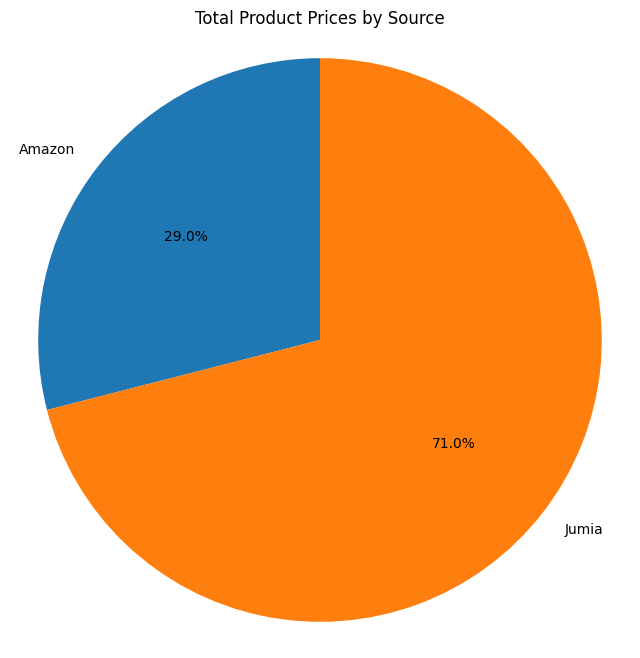

In [49]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the updated CSV file
df1 = pd.read_csv("apple_products_1.csv")

# Convert 'Price' column to numeric, handling errors
df['Price'] = pd.to_numeric(df['Price'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Group data by source and sum prices
price_by_source = df.groupby('Website')['Price'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(price_by_source, labels=price_by_source.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Product Prices by Source')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
